#                           What Makes a Movie Profitable? Analysis of Movie Returns and Associated Factors



## 1. Business Understanding 
### 1.1 Introduction

Microsoft Corporation is a multinational technology company that develops, manufactures, licenses, supports, and sells computer software, consumer electronics, and personal computers. It is known for its flagship products like the Windows operating system, Microsoft Office suite, and Azure cloud computing platform. Product diversification into new sectors enables a corporation reduce dependence on a single industry, tap into new markets, cross-sell, adapt to evolving consumer needs, and sustain long-term success. 

 Diversifying to create original video content can help Microsoft expand their brand presence and reach a wider audience, enhancing their overall visibility and reputation. Also, movies provide opportunities for cross-promotion and product placements, allowing Microsoft to showcase its products and services to a massive audience.   Venturing into movies can open up new revenue streams through licensing and distribution agreements. 


### 1.2  Business Problem
Diversification should be approached strategically and based on evidence from market research for successful expansion.  There is a need to understand market trends particularly levels of investment and returns. Also understanding of customer preference is indispensable   in order to invest in products which resonate with the demand and have significant returns. This understanding enables one to make informed decisions, tailor products to the target market, develop effective marketing strategies, and mitigate potential risks. By gaining insights into the new market's opportunities and challenges, a corporation can position themselves for successful diversification and increase the likelihood of achieving desired outcomes.

Companies have accrued significant profits from the movie industry. However, this is not guaranteed as the returns are determined by a number of risk factors.  In this regard, I analyze historical data on varied variables to determine what determine profits from movies to inform investment decisions.  


### 1.3 Main Objective

To determine factors that influence profitability of movie genres.

#### Specific Objectives
1. What are the top produced genres of movies?
2. Do average rating, runtimes, budget and production budget influence profitability of movies?
3. What genres should the company consider investing in?


### 1.4 Data Understanding 

The data used was downloaded from the Box Office Mojo and IMDB. Inline with the objective, the analysis focused on variables which are defined below. 

**Genres**: Category of artistic composition, characterized by similarities in form, style, or subject matter for a piece of content.

**Production budget**: The production cost of a movie.

**Worldwide gross**: Box office revenues from all countries the movie sold.

**Profit**:	Computed as worldwide gross less production budget

### 1.5 Document Organization
1. Loading and Checking Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Conclusions and Recommendations


### 2 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 3 Reading Data 

In [2]:
#Loads the data from three csv files which have columns  that align with the  main and specific objectives 
Movie_budget_revenues = pd.read_csv('tn.movie_budgets.csv')
Title_ratings = pd.read_csv('title.ratings.csv')
Movie_basics = pd.read_csv('title.basics.csv')

### 4 Data Wrangling
#### 4.1 Joining Datasets

The three csv files are joined to be one then irrelevant columns are dropped from the combined data set 

In [3]:
# The title ratings and movie basic have a common column tconst which is  alphanumeric unique identifier of a movie title.
#tconst was used to  combined the datasets 
combined = pd.merge(Title_ratings, Movie_basics, on='tconst', how='left')

In [4]:
# The combined above and Movie_budget_revenues dataset have a common column of movie title
# The column movie was used to combine the datasets 
# First have change the column name for left joining 
combined  = combined.rename(columns={'original_title': 'movie'})

# Using outer join to  merge combined datasets of  movie rating and movie basic with  budget and revenue 
final_data = pd.merge(Movie_budget_revenues, combined, on='movie', how='left')

#### 4.2 Dropping irrelevant columns

In [5]:
#The loaded data from three files  has irrelevant columns in relation to the objective.

final_data= final_data.drop (['id','movie','release_date', 'tconst', 'numvotes', 'primary_title','start_year', 'domestic_gross'], axis=1)

##### The dataset has five columns namely; production_budget, worldwide_gross, averagerating, runtime_minutes and genres 

#### 4.3 Checking the Data

In [6]:
#specifying  that all floating-point numbers should be displayed with 2 decimal places. 
pd.options.display.float_format = '{:.2f}'.format

In [7]:
# Determining the no. of records in  dataset
final_data.shape

(6297, 5)

The final dataset has 6297 rows  and  5 columns

In [8]:
# Previewing the top of  dataset
final_data.head()

,production_budget,worldwide_gross,averagerating,runtime_minutes,genres
0,"$425,000,000","$2,776,345,279",NaN,NaN,NaN
1,"$410,600,000","$1,045,663,875",6.60,136.00,"Action,Adventure,Fantasy"
2,"$350,000,000","$149,762,350",6.00,113.00,"Action,Adventure,Sci-Fi"
3,"$330,600,000","$1,403,013,963",7.30,141.00,"Action,Adventure,Sci-Fi"
4,"$317,000,000","$1,316,721,747",NaN,NaN,NaN


In [9]:
# Previewing the bottom of  dataset
final_data.tail()

,production_budget,worldwide_gross,averagerating,runtime_minutes,genres
6292,"$7,000",$0,5.60,77.00,"Horror,Sci-Fi,Thriller"
6293,"$6,000","$240,495",NaN,NaN,NaN
6294,"$5,000","$1,338",NaN,NaN,NaN
6295,"$1,400",$0,5.40,76.00,"Drama,Horror,Thriller"
6296,"$1,100","$181,041",NaN,NaN,NaN


In [10]:
# Checking whether each column has an appropriate datatype
final_data.dtypes

production_budget     object
worldwide_gross       object
averagerating        float64
runtime_minutes      float64
genres                object
dtype: object

##### Genres, average rating and run time minutes are of the correct data type which is      object and float64 respectively. Production budget and worldwide gross are of object data type which should be corrected to float64

### 4.4 Data Cleaning

In [11]:
#Remove $ and comma from production budget  and wordlwide gross then converting  to float 
final_data['production_budget'] = final_data['production_budget'].str.replace("$", "")
final_data['production_budget'] = final_data['production_budget'].str.replace(",", "")
final_data['production_budget'] = final_data['production_budget'] .astype(float)

In [12]:
#Remove $ and comma from production budget  and wordlwide gross then converting  to float 
final_data['worldwide_gross'] = final_data['worldwide_gross'].str.replace("$", "")
final_data['worldwide_gross'] = final_data['worldwide_gross'].str.replace(",", "")
final_data['worldwide_gross'] = final_data['worldwide_gross'] .astype(float)

In [13]:
# Checking for missing values 
final_data.isna().sum()

production_budget       0
worldwide_gross         0
averagerating        3659
runtime_minutes      3765
genres               3664
dtype: int64

 ##### Genres, average rating and run time minutes have missing values.

In [14]:
#Dropping missing values. 
columns_to_drop_na = ['averagerating', 'runtime_minutes', 'genres']
final_data.dropna(subset=columns_to_drop_na, inplace=True)



##### Genres, average rating and run time minutes have missing values were dropped given back refill nor forward refill is applicable.

In [15]:
#Checking if all missing values have been dropped
final_data.isna().sum()

production_budget    0
worldwide_gross      0
averagerating        0
runtime_minutes      0
genres               0
dtype: int64

In [16]:
# Checking for duplicated rows and ispecting any if there are
duplicate_rows = final_data[final_data.duplicated()].sum()
print (duplicate_rows)

production_budget   0.00
worldwide_gross     0.00
averagerating       0.00
runtime_minutes     0.00
genres                 0
dtype: object


#### 4.5 Data Decisions 
I decided to focus only on productions budgets  and  a worldwide gross of more than  $10million.

In [17]:
# Setting minimum for production budget 

final_data = final_data[final_data['production_budget'] >= 10000000]

# Setting minimum for worldwide_gross 
final_data = final_data[final_data['worldwide_gross'] >= 10000000]


##### Decided to focus on movies with a rating of five and above

In [18]:
# Setting minimum for averagerating
final_data = final_data[final_data['averagerating'] >= 5]

In [19]:
final_data.head()


,production_budget,worldwide_gross,averagerating,runtime_minutes,genres
1,410600000.00,1045663875.00,6.60,136.00,"Action,Adventure,Fantasy"
2,350000000.00,149762350.00,6.00,113.00,"Action,Adventure,Sci-Fi"
3,330600000.00,1403013963.00,7.30,141.00,"Action,Adventure,Sci-Fi"
6,300000000.00,2048134200.00,8.50,149.00,"Action,Adventure,Sci-Fi"
8,300000000.00,655945209.00,6.50,120.00,"Action,Adventure,Fantasy"


In [35]:
#compute profit from  worldwide gross and production budget

final_data ['Profit'] = final_data ['worldwide_gross'] - final_data ['production_budget']


## 5 Exploratory Data Analysis
### 5.1  Univariate Analysis

In [21]:
# AGroup movies by genre and rank them
grouped_data = final_data.groupby('genres').size().sort_values(ascending=False).reset_index(name='count')
# Display the top 10 genres with adjusted index starting from 1
top_10_genres = grouped_data.head(10).reset_index(drop=True)
top_10_genres.index = top_10_genres.index + 1
top_10_genres[['genres', 'count']]


,genres,count
1,"Adventure,Animation,Comedy",66
2,Drama,60
3,"Action,Adventure,Sci-Fi",51
4,Comedy,46
5,Documentary,40
6,"Action,Adventure,Fantasy",39
7,"Comedy,Drama",34
8,"Comedy,Romance",33
9,"Action,Crime,Drama",30
10,"Drama,Romance",28


Drama is the most common genre with a count of 211. Documentary and Comedy follow with 108 and 88 counts, respectively. Comedy, adventure, animation, and romance also appear frequently.

In [22]:
# Group movies by genre and calculate the average rating for top 10 genres 
grouped_genre_averagerating = final_data.groupby('genres')['averagerating'].mean().reset_index()

# Sort the genres based on the averagerating in descending order
sorted_genre_averagerating = grouped_genre_averagerating.sort_values(by='averagerating', ascending=False)

# Select the top 10 genres as per averagerating
top_10_genres_averagerating = sorted_genre_averagerating.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_averagerating = top_10_genres_averagerating.reset_index(drop=True)
top_10_genres_averagerating.index = top_10_genres_averagerating.index + 1

# Display the top 10 genres with their average ratings
top_10_genres_averagerating[['genres', 'averagerating']]

,genres,averagerating
1,"Action,Documentary,Drama",8.70
2,"Drama,Western",8.40
3,"Adventure,Drama,Sci-Fi",8.30
4,"Mystery,Thriller",8.10
5,Mystery,8.10
6,"Action,Comedy,Drama",8.00
7,"Biography,Documentary,Drama",7.85
8,"Comedy,Drama,Fantasy",7.80
9,"Biography,Documentary,Music",7.70
10,"Adventure,Documentary,History",7.60


In [23]:
# Group movies by genre and calculate the total production budget for top 10 genres
grouped_genre_budget = final_data.groupby('genres')['production_budget'].sum().reset_index()

# Sort the genres based on the worldwide production budget in descending order
sorted_genre_budget = grouped_genre_budget.sort_values(by='production_budget', ascending=False)

# Select the top 10 genres as per production budget
top_10_genres_budget = sorted_genre_budget.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_budget.index = range(1, len(top_10_genres_budget) + 1)

# Display the top 10 genres as per production budget
top_10_genres_budget[['genres', 'production_budget']]

,genres,production_budget
1,"Action,Adventure,Sci-Fi",8687600000.00
2,"Adventure,Animation,Comedy",6822500000.00
3,"Action,Adventure,Fantasy",5117600000.00
4,"Action,Adventure,Drama",2393000000.00
5,"Action,Adventure,Comedy",2281500000.00
6,Drama,2264000000.00
7,Documentary,2141000000.00
8,"Adventure,Family,Fantasy",1982900000.00
9,"Action,Adventure,Animation",1919000000.00
10,Comedy,1840100000.00


Production budgets differ across genres. Action, adventure, and Sci-Fi movies have the highest production budget followed by adventure, animation, and comedy. Other genres like drama, documentary, and comedy also have significant production budgets.

In [24]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = final_data.groupby('genres')['worldwide_gross'].sum().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='worldwide_gross', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)

# Display the genres and their worldwide gross
top_10_genres_worldwidegross[['genres', 'worldwide_gross']]

,genres,worldwide_gross
1,"Action,Adventure,Sci-Fi",32041577977.00
2,"Adventure,Animation,Comedy",26570908335.00
3,"Action,Adventure,Fantasy",13868619765.00
4,"Action,Adventure,Comedy",9644942765.00
5,"Action,Adventure,Animation",7312482956.00
6,"Adventure,Family,Fantasy",5821447159.00
7,Drama,5815779066.00
8,Documentary,5391412879.00
9,Comedy,5214246713.00
10,"Action,Adventure,Drama",4960223945.00


Action, adventure, and Sci-Fi movies generated the highest worldwide gross followed by adventure, animation, and comedy. Genres like drama, comedy, and documentary also achieved substantial worldwide gross revenue.

In [25]:
# Group movies by genre and calculate the total worldwide  profit for top 10 genres
grouped_genre_profit = final_data.groupby('genres')['Profit'].sum().reset_index()

# Sort the genres based on the profit in descending order
sorted_genre_profit = grouped_genre_profit.sort_values(by='Profit', ascending=False)

# Select the top 10 profitable genres
top_10_genres_profit = sorted_genre_profit.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_profit.index = range(1, len(top_10_genres_profit) + 1)

# Display the genres and their profit
top_10_genres_profit[['genres', 'Profit']]

,genres,Profit
1,"Action,Adventure,Sci-Fi",23353977977.00
2,"Adventure,Animation,Comedy",19748408335.00
3,"Action,Adventure,Fantasy",8751019765.00
4,"Action,Adventure,Comedy",7363442765.00
5,"Action,Adventure,Animation",5393482956.00
6,"Adventure,Family,Fantasy",3838547159.00
7,Drama,3551779066.00
8,Comedy,3374146713.00
9,Documentary,3250412879.00
10,"Action,Adventure,Thriller",3037574473.00


There is a similar pattern as with worldwide gross where action, adventure, and Sci-Fi movies generated the highest profit of followed by adventure, animation, and comedy. Similarly, drama, comedy, and documentary also accrued notable profitability.

## 5.2 Correlation

In [26]:
#Correlation between profit and averagerating
correlation_profit_averagerating = final_data['Profit'].corr(final_data['averagerating'])
correlation_profit_averagerating = round(correlation_profit_averagerating, 2)
print("The correlation between profit and averagerating is", correlation_profit_averagerating )


The correlation between profit and averagerating is 0.27


In [27]:
#Correlation between profit and production budget
correlation_profit_productionbudget = final_data['Profit'].corr(final_data['production_budget'])
correlation_profit_productionbudget = round(correlation_profit_productionbudget, 2)
print("The correlation between profit and production_budget is",correlation_profit_productionbudget)


The correlation between profit and production_budget is 0.6


In [28]:
#Correlation between profit and  run time minutes
correlation_profit_runtime_minutes = final_data['Profit'].corr(final_data['runtime_minutes'])
correlation_profit_runtime_minutes  = round(correlation_profit_runtime_minutes , 2)
print("The correlation between profit and runtime_minutes is",correlation_profit_runtime_minutes)

The correlation between profit and runtime_minutes is 0.18


### 5.3 Visualization 

Text(0.5, 1.0, 'Top 10 Genres')

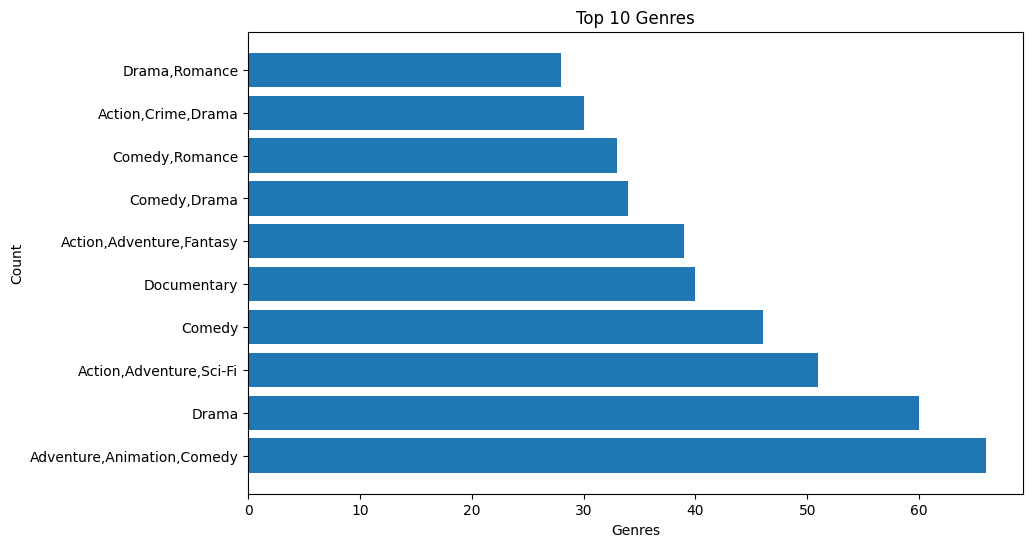

In [29]:
# Bar graph between for top 10 genres
plt.figure(figsize=(10, 6))
plt.barh (top_10_genres['genres'], top_10_genres['count'])
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Genres')


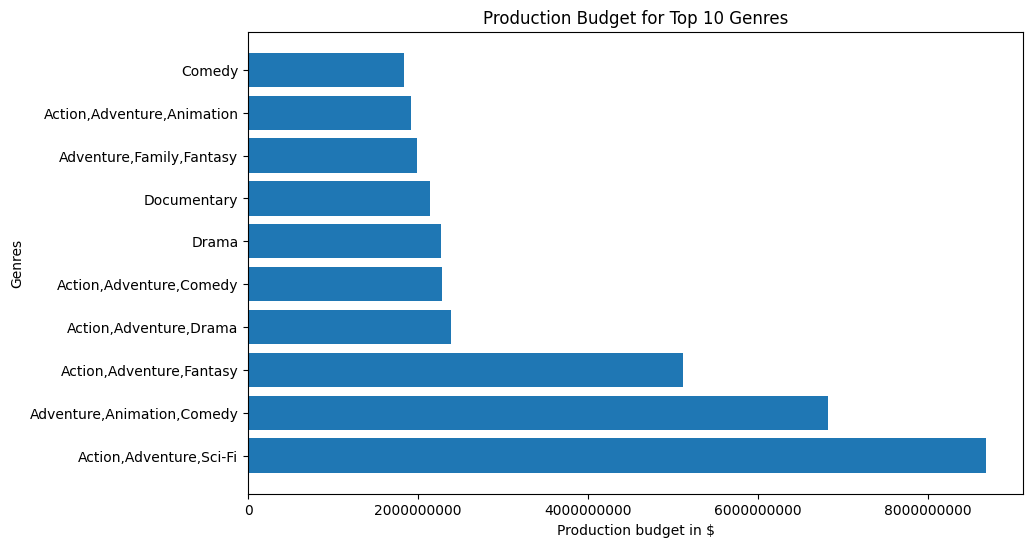

In [30]:
# Bar graph between for top 10 genres and production budget 
plt.figure(figsize=(10, 6))
plt.barh (top_10_genres_budget['genres'], top_10_genres_budget['production_budget'])
plt.xlabel('Production budget in $')
plt.ylabel('Genres')
plt.title('Production Budget for Top 10 Genres')
plt.ticklabel_format(style='plain', axis='x')

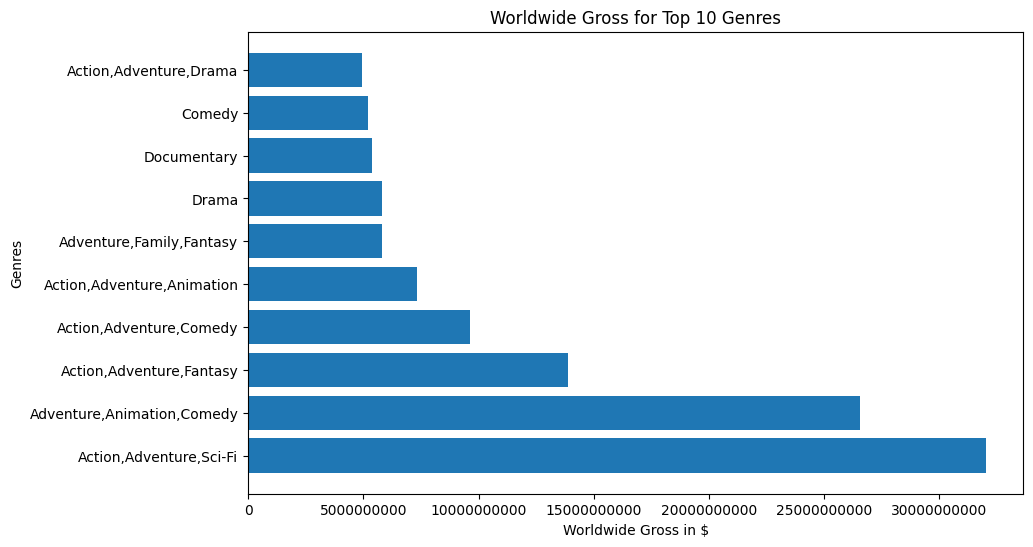

In [31]:
# Bar graph between for top 10 Genres and worldwide gross
plt.figure(figsize=(10, 6))
plt.barh(top_10_genres_worldwidegross['genres'], top_10_genres_worldwidegross['worldwide_gross'])
plt.xlabel('Worldwide Gross in $')
plt.ylabel('Genres')
plt.title('Worldwide Gross for Top 10 Genres')
plt.ticklabel_format(style='plain', axis='x')

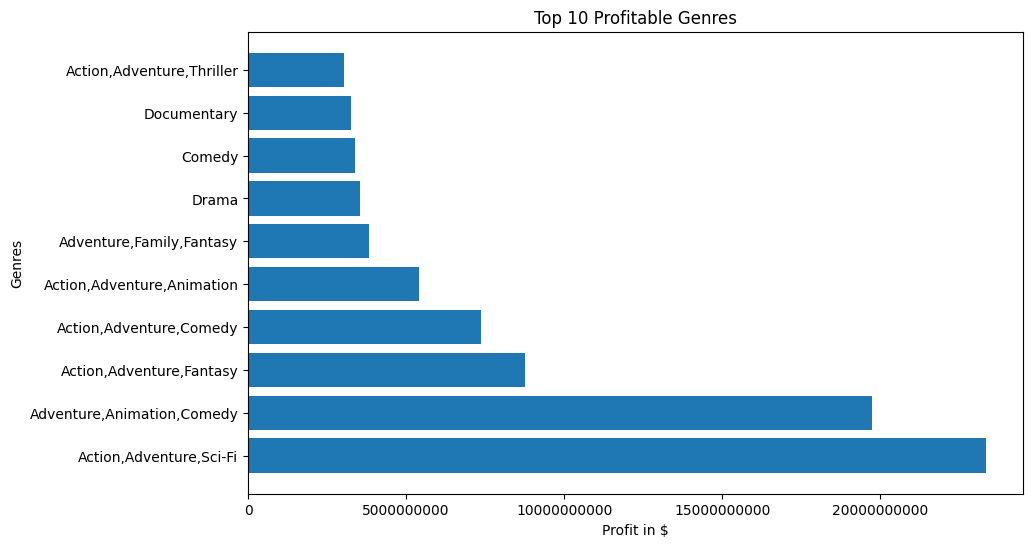

In [32]:
# Bar graph between for top 10 genres and profit
plt.figure(figsize=(10, 6))
plt.barh(top_10_genres_profit['genres'], top_10_genres_profit['Profit'])
plt.xlabel('Profit in $')
plt.ylabel('Genres')
plt.title('Top 10 Profitable Genres')
plt.ticklabel_format(style='plain', axis='x')

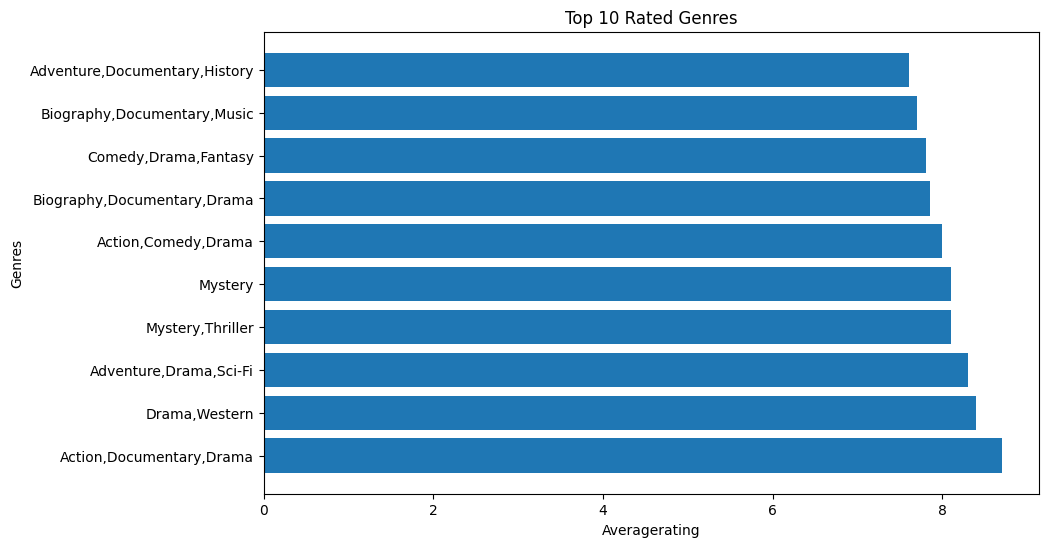

In [33]:
# Bar graph between for top 10 genres and average rating
plt.figure(figsize=(10, 6))
plt.barh (top_10_genres_averagerating['genres'], top_10_genres_averagerating['averagerating'])
plt.xlabel('Averagerating')
plt.ylabel('Genres')
plt.title('Top 10 Rated Genres')
plt.ticklabel_format(style='plain', axis='x')

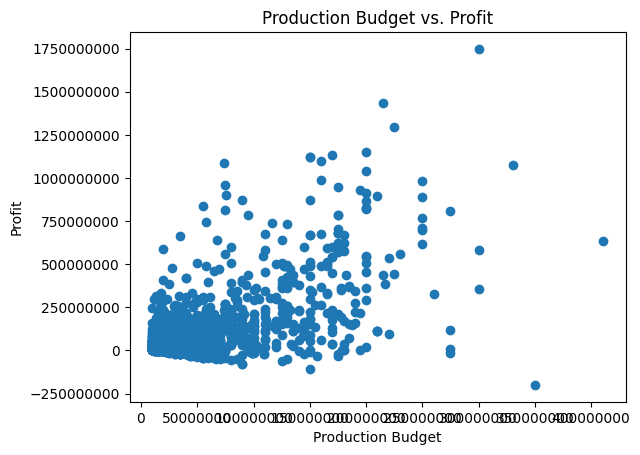

In [34]:
# Create the scatter plot
plt.scatter(final_data['production_budget'], final_data['Profit'])
plt.title("Production Budget vs. Profit")
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.ticklabel_format(useOffset=False, style='plain')

### 6 Conclusions

-  There is a positive correlation between profit and production budget (0.65) and a weaker positive correlation with average rating (0.19) and runtime minutes (0.20). These correlations suggest that higher production budgets tend to result in higher profits, while the impact of average rating and runtime is comparatively smaller.

- A comparison of top 10 genres and top-rated genres with gross and profitability shows high ratings do not guarantee movie profitability.

- Action, Adventure, Sci-Fi and Adventure, Animation, Comedy are the top genres with the highest production budgets and profits.

- Drama, Documentary, and Adventure, Drama, Sci-Fi receive high ratings with moderate production budgets.

- Drama, Comedy, and Adventure, Animation, Comedy are popular genres with moderate production budgets and modest returns 

- Investing in higher production budgets can potentially lead to higher profits. This indicates that allocating more financial resources to the production of a film could be a viable strategy for maximizing returns on investment. However there are other factors influencing profitability in the film industry. As such there is need for further research.


### 7 Recommendations 
* While choosing the movie to produce, genre, production budget and profitability should be the main factors followed by average rating
- Focus on high-budget genres with strong profitability: Action, Adventure, Sci-Fi, Adventure, Animation, Comedy, and Action, Adventure, Fantasy have both high production budgets and significant profits. Investing in these genres can offer potential returns on investment due to their popularity and financial success.

- Consider genres with high ratings and moderate production budgets: Genres like Drama, Documentary, and Adventure, Drama, Sci-Fi receive high ratings and have moderate production budgets. These genres indicate a balance between critical acclaim and financial viability, making them promising investment options.

- Explore opportunities in popular genres with moderate production budgets: Drama, Comedy, and Adventure, Animation, Comedy are popular genres with moderate production budgets. Investing in these genres can tap into widespread audience appeal while managing production costs effectively, potentially leading to profitability.
